In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent_step(f, vars, point, alpha):
    gradient = sp.Matrix([sp.diff(f, var) for var in vars])
    grad_value = gradient.subs({vars[i]: point[i] for i in range(len(vars))})
    grad_value = np.array([float(grad_value[i]) for i in range(len(vars))])
    new_point = np.array(point) - alpha * grad_value
    return new_point, grad_value

In [3]:
def gradient_descent():
    n = int(input("Enter the number of variables: "))
    vars = sp.symbols('x0:%d' % n)
    f = sp.sympify(input(f"Enter your function in terms of {', '.join([str(var) for var in vars])}: "))
    
    start_points = list(map(float, input(f"Enter your starting point (comma-separated for {n} variables): ").split(',')))
    alpha = float(input("Enter the learning rate (alpha): "))
    epsilon = 0.01

    points = [start_points]
    z_values = [float(f.subs({vars[i]: start_points[i] for i in range(n)}))]

    grad_value = np.array([np.inf] * n)

    while np.linalg.norm(grad_value) > epsilon:
        current_point = points[-1]
        new_point, grad_value = gradient_descent_step(f, vars, current_point, alpha)
        points.append(new_point)
        z_values.append(float(f.subs({vars[i]: new_point[i] for i in range(n)})))

    if n == 1:
        x_points = [p[0] for p in points]
        y_points = z_values

        plt.plot(x_points, y_points, c='r', marker='o', label='Gradient Descent Points')
        plt.xlabel('X')
        plt.ylabel('f(X)')
        plt.title('Gradient Descent Optimization (1D)')
        plt.legend()
        plt.show()
        print(f"Final point for {n}-dimensional function : {points[-1]}")

    elif n == 2:
        x_points = [p[0] for p in points]
        y_points = [p[1] for p in points]
        z_points = z_values

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x_points, y_points, z_points, c='r', marker='o', label='Gradient Descent Points')
        ax.set_xlabel('X0')
        ax.set_ylabel('X1')
        ax.set_zlabel('f(X0, X1)')
        ax.set_title('Gradient Descent Optimization (2D)')

        x_vals = np.linspace(float(min(x_points)), float(max(x_points)), 100)
        y_vals = np.linspace(float(min(y_points)), float(max(y_points)), 100)
        X, Y = np.meshgrid(x_vals, y_vals)
        Z = np.array([[float(f.subs({vars[0]: x_val, vars[1]: y_val})) for x_val, y_val in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
        
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, antialiased=True)
        plt.legend()
        plt.show()
        print(f"Final point for {n}-dimensional function : {points[-1]}")

    else:
        print(f"Final point for {n}-dimensional function : {points[-1]}")

Enter the number of variables:  2
Enter your function in terms of x0, x1:  x0**2 + x1**2
Enter your starting point (comma-separated for 2 variables):  2,5
Enter the learning rate (alpha):  0.1


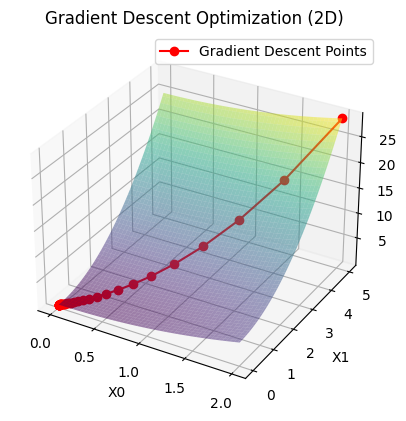

Final point for 2-dimensional function: [0.00126765 0.00316913]


In [9]:
gradient_descent()